In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import os
import objaverse
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))
from src import *

objaverse._VERSIONED_PATH=os.path.join('../.objaverse', "hf-objaverse-v1")
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.15)

# Filter only objects having one diffusion texture
##### ℹ️ This notebook requires `data/2-annotations_filtered_by_thumbnails.parquet`. It also requires the `statistics.parquet` file generated by `compute_statistics.py`.
This notebook downloads all the filtered objects and filter them based on the the textures they have.

In [4]:
statistics = pd.read_parquet("statistics.parquet")
statistics.head()

,meshCount,uvCount,diffuseCount
uid,,,
fcdfc931f73b4865a4a4005c65fc2afe,1,1,0
2dc0552b029245d899a35ec3bf58256b,2,<NA>,<NA>
0ec69f6a8e0f48e5876710cfe81643fa,1,1,1
3788555afb0944dc8aceb4674764a3dc,2,<NA>,<NA>
5efbfe21204743559165377a163896c3,4,<NA>,<NA>


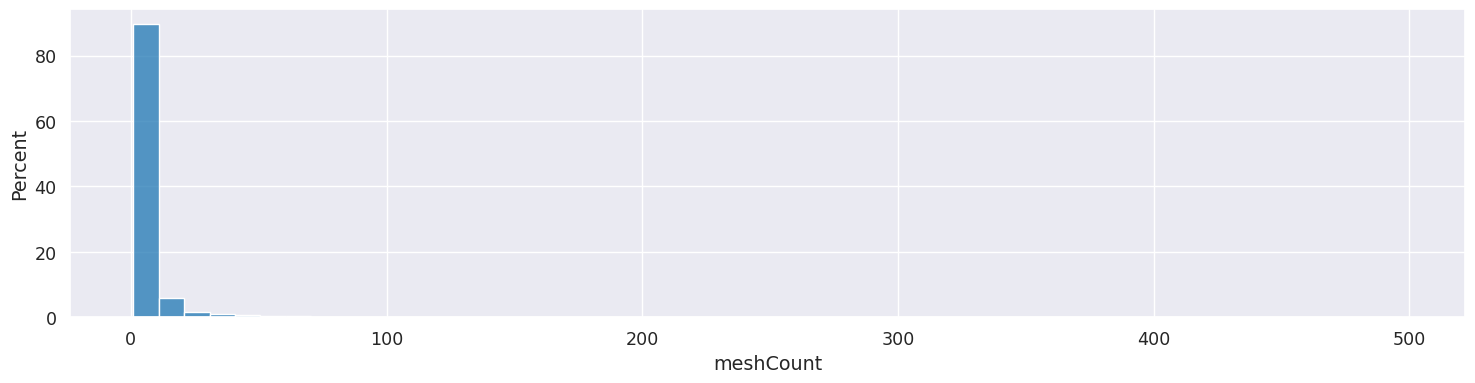

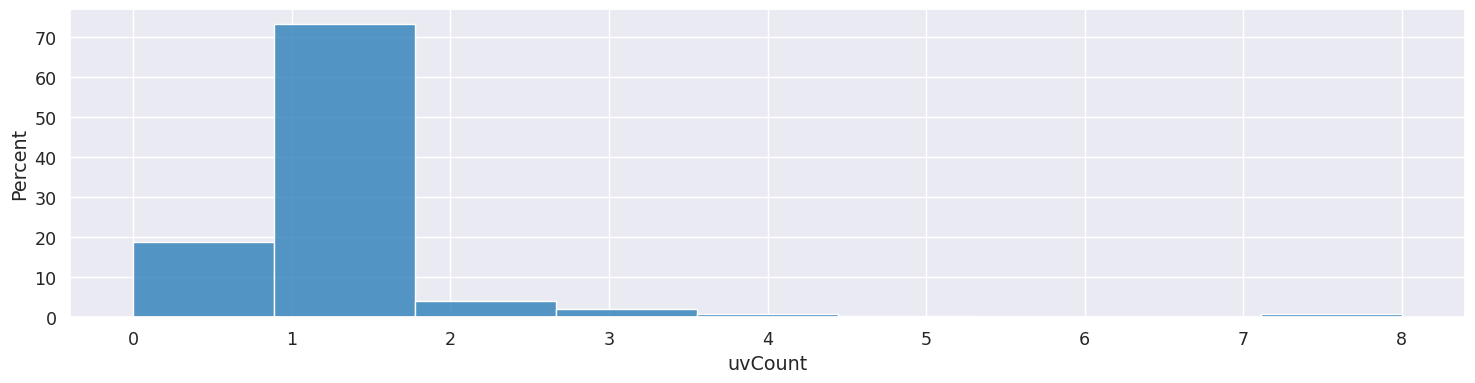

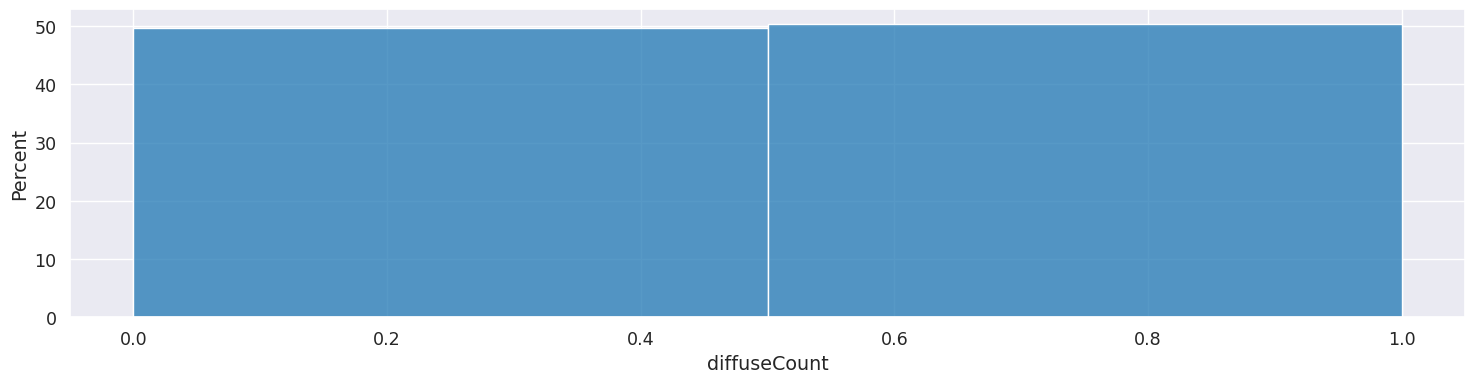

In [7]:
for data in [statistics["meshCount"], statistics["uvCount"], statistics["diffuseCount"]]:
    plt.figure(figsize=(18, 4))
    sns.histplot(data, bins=min(50, max(data.dropna()) + 1), stat="percent")
    plt.show()

## How many GLB files have 1 Mesh, 1 UV map and 1 diffuse texture?
Let's check the number of meshes per GLB file first. This takes a random sample of 100 objects. To process the whole dataset, we need a computational node (see [get_statistics.py](get_statistics.py)), otherwise the login node kills the jupyter server after 1000 objects or so.

##### 👉🏼 About $50\%$ of GLB files contain 1 and only one mesh object.

##### 👉🏼 About $75\%$ of them have exactly 1 UV map.

##### 👉🏼 About $60\%$ of them have exactly 1 UV map.
Thus we end up with about $50\% \times 75\% \times 60\% = 22.5\%$ meeting the requirements.

In [8]:
statistics = pd.read_parquet('statistics.parquet')
percentage=(statistics['diffuseCount']==1).sum()/len(statistics)*100
f'{percentage:.2f}% of GLBs meet the requirements'

'24.46% of GLBs meet the requirements'